In [69]:
import pandas as pd
import requests
from datetime import datetime

bitcoin_data = pd.read_csv("../../DataSets/CryptoHistory/archive/coin_Bitcoin.csv")



In [70]:
bitcoin_data = bitcoin_data.drop(["Name","Symbol","SNo","Marketcap"],axis=1)
bitcoin_data

,Date,High,Low,Open,Close,Volume
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00
...,...,...,...,...,...,...
2986,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10
2987,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10
2988,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10
2989,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10


In [71]:

# Custom order of columns
new_order = ['Date', 'Open', 'High', 'Low', 'Close' , 'Volume']

# Reordering columns
bitcoin_data = bitcoin_data[new_order]
bitcoin_data

,Date,Open,High,Low,Close,Volume
0,2013-04-29 23:59:59,134.444000,147.488007,134.000000,144.539993,0.000000e+00
1,2013-04-30 23:59:59,144.000000,146.929993,134.050003,139.000000,0.000000e+00
2,2013-05-01 23:59:59,139.000000,139.889999,107.720001,116.989998,0.000000e+00
3,2013-05-02 23:59:59,116.379997,125.599998,92.281898,105.209999,0.000000e+00
4,2013-05-03 23:59:59,106.250000,108.127998,79.099998,97.750000,0.000000e+00
...,...,...,...,...,...,...
2986,2021-07-02 23:59:59,33549.600177,33939.588699,32770.680780,33897.048590,3.872897e+10
2987,2021-07-03 23:59:59,33854.421362,34909.259899,33402.696536,34668.548402,2.438396e+10
2988,2021-07-04 23:59:59,34665.564866,35937.567147,34396.477458,35287.779766,2.492431e+10
2989,2021-07-05 23:59:59,35284.344430,35284.344430,33213.661034,33746.002456,2.672155e+10


In [73]:
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
# Set the 'Date' column as the index
bitcoin_data.set_index('Date', inplace=True)

print(bitcoin_data)

                             Open          High           Low         Close  \
Date                                                                          
2013-04-29 23:59:59    134.444000    147.488007    134.000000    144.539993   
2013-04-30 23:59:59    144.000000    146.929993    134.050003    139.000000   
2013-05-01 23:59:59    139.000000    139.889999    107.720001    116.989998   
2013-05-02 23:59:59    116.379997    125.599998     92.281898    105.209999   
2013-05-03 23:59:59    106.250000    108.127998     79.099998     97.750000   
...                           ...           ...           ...           ...   
2021-07-02 23:59:59  33549.600177  33939.588699  32770.680780  33897.048590   
2021-07-03 23:59:59  33854.421362  34909.259899  33402.696536  34668.548402   
2021-07-04 23:59:59  34665.564866  35937.567147  34396.477458  35287.779766   
2021-07-05 23:59:59  35284.344430  35284.344430  33213.661034  33746.002456   
2021-07-06 23:59:59  33723.509655  35038.536363  335

In [74]:
# Check for missing values
print(bitcoin_data.isnull().sum())

# Handle missing values if any
bitcoin_data.fillna(method='ffill', inplace=True)



Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


/tmp/ipykernel_54089/583635272.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bitcoin_data.fillna(method='ffill', inplace=True)


In [76]:
print(bitcoin_data.describe())

               Open          High           Low         Close        Volume
count   2991.000000   2991.000000   2991.000000   2991.000000  2.991000e+03
mean    6700.146240   6893.326038   6486.009539   6711.290443  1.090633e+10
std    11288.043736  11642.832456  10869.032130  11298.141921  1.888895e+10
min       68.504997     74.561096     65.526001     68.431000  0.000000e+00
25%      430.445496    436.179001    422.879486    430.569489  3.036725e+07
50%     2269.889893   2387.610107   2178.500000   2286.409912  9.460360e+08
75%     8569.656494   8733.926948   8289.800459   8576.238715  1.592015e+10
max    63523.754869  64863.098908  62208.964366  63503.457930  3.509679e+11


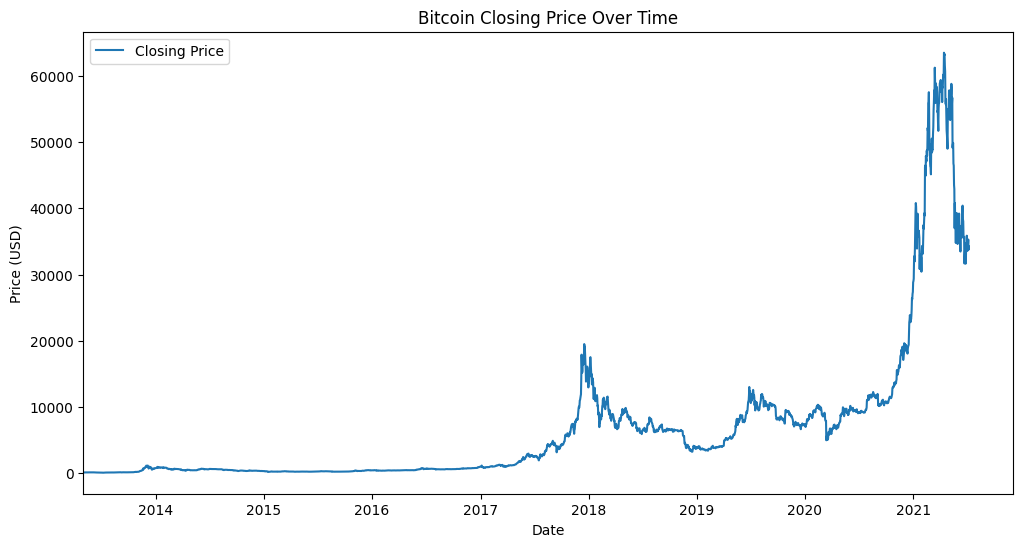

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(bitcoin_data.index,bitcoin_data['Close'], label='Closing Price', linestyle='-')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.xlim(pd.Timestamp('2013-05-01'), None)
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


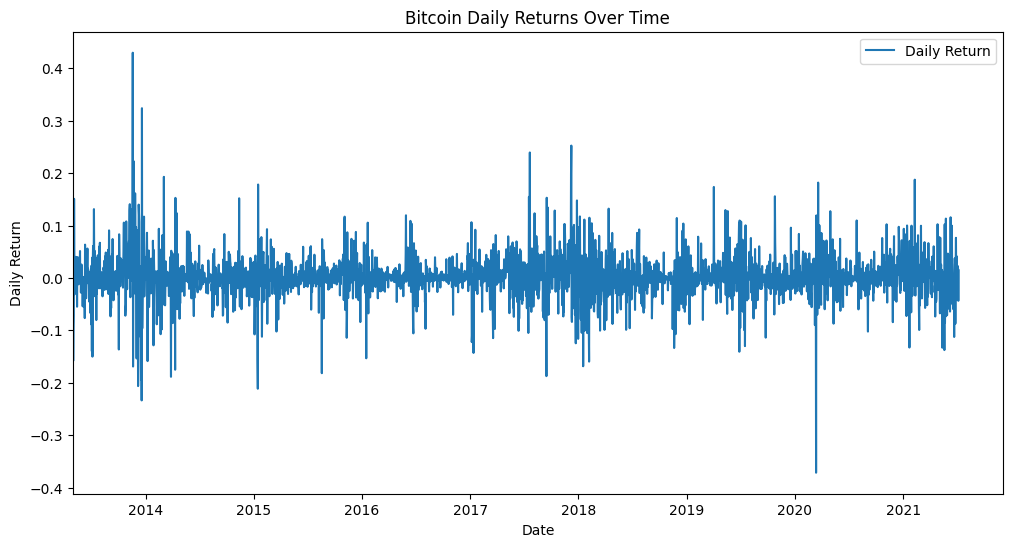

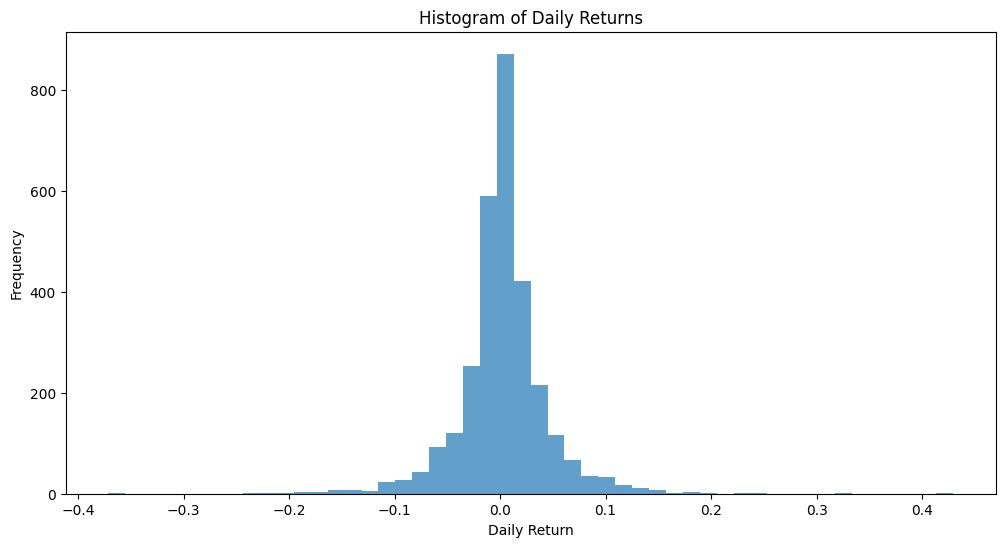

In [81]:
bitcoin_data['daily_return'] = bitcoin_data['Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(bitcoin_data['daily_return'], label='Daily Return')
plt.title('Bitcoin Daily Returns Over Time')
plt.xlim(pd.Timestamp('2013-05-01'), None)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Histogram of daily returns
plt.figure(figsize=(12,6))
plt.hist(bitcoin_data['daily_return'].dropna(), bins=50, alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


In [86]:
bitcoin_data

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2013-04-29 23:59:59,134.444000,147.488007,134.000000,144.539993,0.000000e+00,NaN
2013-04-30 23:59:59,144.000000,146.929993,134.050003,139.000000,0.000000e+00,-0.038328
2013-05-01 23:59:59,139.000000,139.889999,107.720001,116.989998,0.000000e+00,-0.158345
2013-05-02 23:59:59,116.379997,125.599998,92.281898,105.209999,0.000000e+00,-0.100692
2013-05-03 23:59:59,106.250000,108.127998,79.099998,97.750000,0.000000e+00,-0.070906
...,...,...,...,...,...,...
2021-07-02 23:59:59,33549.600177,33939.588699,32770.680780,33897.048590,3.872897e+10,0.009679
2021-07-03 23:59:59,33854.421362,34909.259899,33402.696536,34668.548402,2.438396e+10,0.022760
2021-07-04 23:59:59,34665.564866,35937.567147,34396.477458,35287.779766,2.492431e+10,0.017861


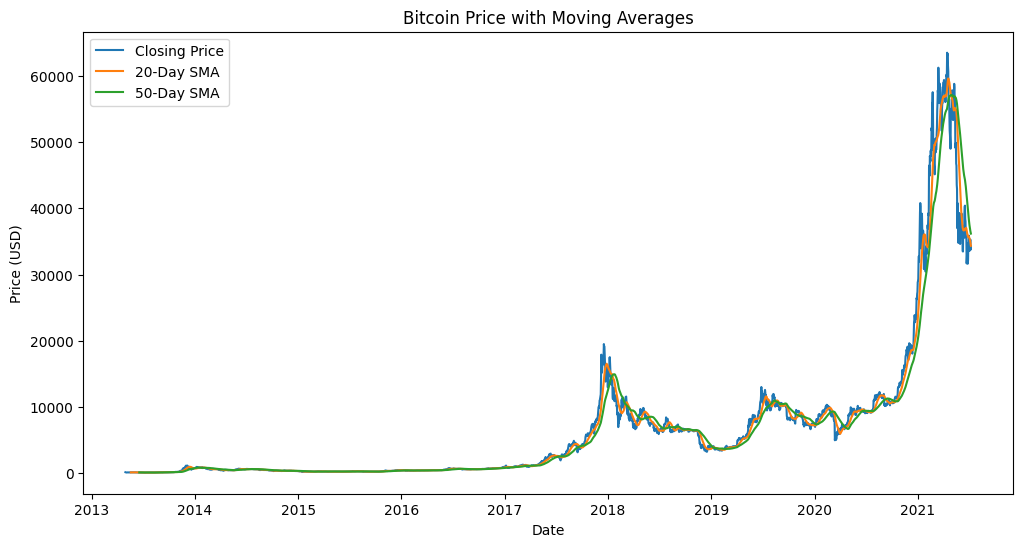

In [95]:
bitcoin_data['SMA_20'] = bitcoin_data['Close'].rolling(window=20).mean()
bitcoin_data['SMA_50'] = bitcoin_data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(bitcoin_data['Close'], label='Closing Price')
plt.plot(bitcoin_data['SMA_20'], label='20-Day SMA')
plt.plot(bitcoin_data['SMA_50'], label='50-Day SMA')
plt.title('Bitcoin Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

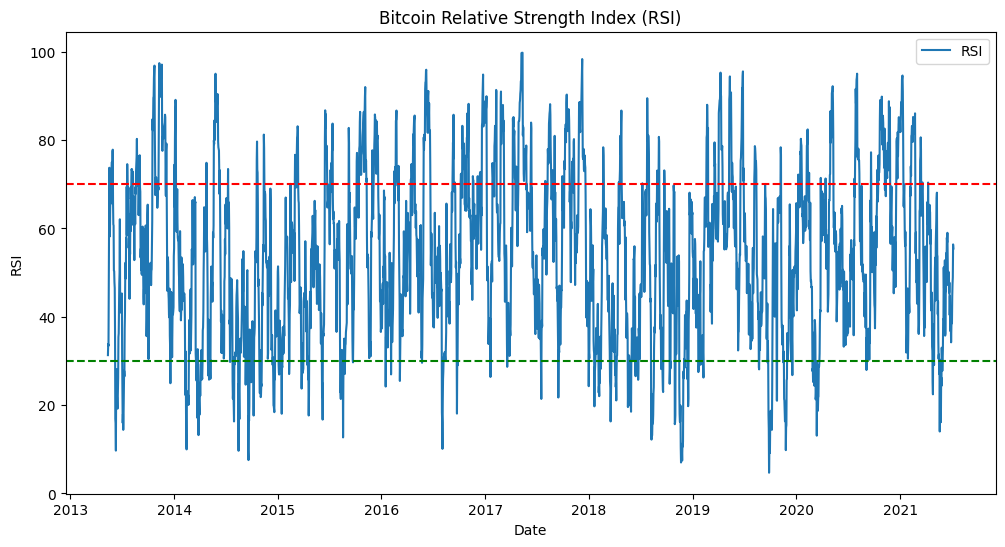

In [97]:
def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

bitcoin_data['RSI'] = calculate_rsi(bitcoin_data['Close'], 14)

plt.figure(figsize=(12,6))
plt.plot(bitcoin_data['RSI'], label='RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('Bitcoin Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


Create model to predict future Bitcoin prices.




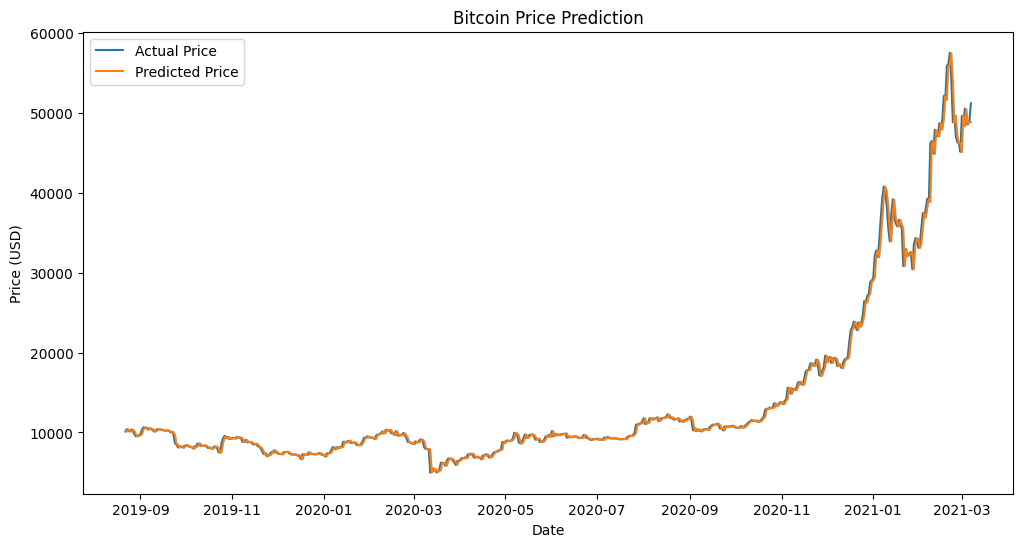

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
bitcoin_data['target'] = bitcoin_data['Close'].shift(-1)
bitcoin_data.dropna(inplace=True)
X = bitcoin_data[['Close', 'SMA_20', 'SMA_50', 'RSI']]
y = bitcoin_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Plot predictions vs actual prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


2941